# S&P500 Index returns Prediction

CS677 Final Project (Shivani, Aigerim, Soham)

## Data Preparation

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=1483142400&period2=1639267200&interval=1d&events=history&includeAdjustedClose=true',
                 parse_dates=['Date'])

In [2]:
data['Return'] = data['Close'] / data['Close'].shift(1) - 1
data = data.fillna(0)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
1240,2021-12-06,456.130005,460.790009,453.559998,458.790009,458.790009,98977532,0.011843
1241,2021-12-07,464.410004,468.880005,458.654602,468.279999,468.279999,95484688,0.020685
1242,2021-12-08,468.700012,470.000000,466.829987,469.519989,469.519989,72238777,0.002648
1243,2021-12-09,468.149994,469.629089,466.140015,466.350006,466.350006,61272568,-0.006752
1244,2021-12-10,469.230011,470.890015,466.524994,470.739990,470.739990,77165506,0.009413


In [3]:
mask = (data['Date'] >= '2017-01-01') & (data['Date'] <= '2020-12-31')
df_train = data.loc[mask]
df_test = data.loc[~mask]
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2017-01-03,225.039993,225.830002,223.883698,225.240005,225.240005,91366522,0.000000
1,2017-01-04,225.619995,226.750000,225.610001,226.580002,226.580002,78744433,0.005949
2,2017-01-05,226.270004,226.580002,225.479996,226.399994,226.399994,78379012,-0.000794
3,2017-01-06,226.529999,227.750000,225.899994,227.210007,227.210007,71559922,0.003578
4,2017-01-09,226.910004,227.070099,226.416306,226.460007,226.460007,46939676,-0.003301


In [4]:
data_train = df_train['Return'].to_list()
data_test = df_test['Return'].to_list()
len(data_train), len(data_test)

(1007, 238)

In [5]:
# length = # of observation + 1 (label)
def preprocess(data, length):
    n = len(data)
    samples = []
    for i in range(0, n-length+1):
        sample = data[i: i+length]
        samples.append(sample)
    samples = np.array(samples)
    x = samples[:, :-1]
    y = samples[:, -1]
    return x, y

In [6]:
X_train, Y_train = preprocess(data_train, length=21)
X_test, Y_test = preprocess(data_test, length=21)

In [7]:
# reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], 1)

## SimpleRNN

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
# create and fit the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(units=4, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')
model.summary()
model.fit(X_train, Y_train, epochs=20, batch_size=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 4)                 24        
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 29
Trainable params: 29
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
987/987 [==============================] - 4s 4ms/step - loss: 8.5856e-04
Epoch 2/20
987/987 [==============================] - 4s 4ms/step - loss: 5.1393e-04
Epoch 3/20
987/987 [==============================] - 4s 4ms/step - loss: 4.3941e-04
Epoch 4/20
987/987 [==============================] - 4s 4ms/step - loss: 4.0653e-04
Epoch 5/20
987/987 [==============================] - 4s 4ms/step - loss: 3.8868e-04
Epoch 6/20
987/987 [===========

In [9]:
from sklearn.metrics import mean_squared_error
import math
def print_error(Y_train, Y_test, train_predict, test_predict):    
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
    test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))    
 
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Mean square error
print_error(Y_train, Y_test, train_predict, test_predict)

Train RMSE: 0.016 RMSE
Test RMSE: 0.011 RMSE


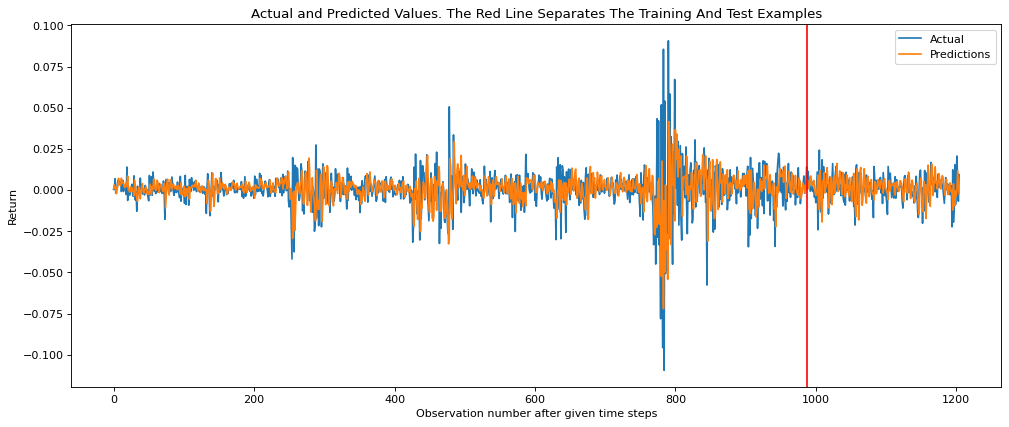

In [10]:
import matplotlib.pyplot as plt
# Plot the result
def plot_result(Y_train, Y_test, train_predict, test_predict):
    actual = np.append(Y_train, Y_test)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(Y_train), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Return')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')
plot_result(Y_train, Y_test, train_predict, test_predict)

In [11]:
#The previous N=20 returns
lastNreturns = np.array(data.Return.iloc[-20:]).reshape((20,1))
LastNDays= lastNreturns
 
LastNDays=LastNDays.reshape(-1,1)
 
# Changing the shape of the data to 3D
# Choosing TimeSteps as 20 because we have used the same for training
NumSamples=1
TimeSteps=20
NumFeatures=1
LastNDays=LastNDays.reshape(NumSamples,TimeSteps,NumFeatures)

In [12]:
lastNreturns

array([[ 0.00754684],
       [ 0.00034242],
       [ 0.00395782],
       [-0.00242922],
       [ 0.00339641],
       [-0.00178825],
       [-0.00281518],
       [ 0.00132599],
       [ 0.00266986],
       [-0.02230317],
       [ 0.01226661],
       [-0.01945761],
       [-0.0111072 ],
       [ 0.0153163 ],
       [-0.00870131],
       [ 0.01184331],
       [ 0.02068482],
       [ 0.00264797],
       [-0.00675154],
       [ 0.0094135 ]])

In [13]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
1240,2021-12-06,456.130005,460.790009,453.559998,458.790009,458.790009,98977532,0.011843
1241,2021-12-07,464.410004,468.880005,458.654602,468.279999,468.279999,95484688,0.020685
1242,2021-12-08,468.700012,470.000000,466.829987,469.519989,469.519989,72238777,0.002648
1243,2021-12-09,468.149994,469.629089,466.140015,466.350006,466.350006,61272568,-0.006752
1244,2021-12-10,469.230011,470.890015,466.524994,470.739990,470.739990,77165506,0.009413


In [14]:
#Prediction based on the previous N=20 days (Model: SimpleRNN)
predicted_Return = model.predict(LastNDays)
predicted_Return

array([[0.00398765]], dtype=float32)

## LSTM

In [15]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# Initialising the RNN
regressor = Sequential()
 
# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 100,activation = 'relu', input_shape = (X_train.shape[1],1), return_sequences=True))
 
# Adding the Second Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 50, activation = 'relu', input_shape = (X_train.shape[1], 1), return_sequences=True))
 
# Adding the Second Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 50, activation = 'relu', return_sequences=False ))
 
 
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
 
##################################################
 
import time
# Measuring the time taken by the model to train
StartTime=time.time()
 
# Fitting the RNN to the Training set
regressor.fit(X_train, Y_train, batch_size = 5, epochs = 50)

Epoch 1/50
198/198 [==============================] - 9s 29ms/step - loss: 1.6751e-04
Epoch 2/50
198/198 [==============================] - 6s 30ms/step - loss: 1.6521e-04
Epoch 3/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6688e-04
Epoch 4/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6610e-04
Epoch 5/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6583e-04
Epoch 6/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6749e-04
Epoch 7/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6476e-04
Epoch 8/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6708e-04
Epoch 9/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6567e-04
Epoch 10/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6585e-04
Epoch 11/50
198/198 [==============================] - 6s 29ms/step - loss: 1.6674e-04
Epoch 12/50
198/198 [==============================]

In [16]:
# make predictions
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)
# Mean square error
print_error(Y_train, Y_test, train_predict, test_predict)

Train RMSE: 0.013 RMSE
Test RMSE: 0.008 RMSE


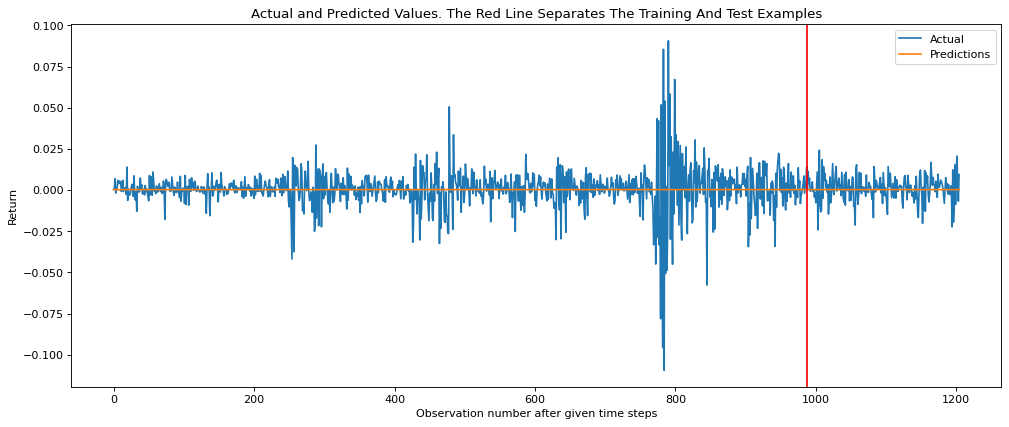

In [17]:
plot_result(Y_train, Y_test, train_predict, test_predict)

In [18]:
#Prediction based on the previous N=20 days (Model: LSTM)
predicted_Return = regressor.predict(LastNDays)
predicted_Return

array([[0.00026333]], dtype=float32)

## GRU

In [19]:
from keras.layers import GRU
def GRU_model_regularization(X_train, Y_train, X_test):

    # The GRU architecture
    my_GRU_model = Sequential()
    # First GRU layer
    my_GRU_model.add(GRU(units=50, return_sequences= True, input_shape=(X_train.shape[1],X_train.shape[2]), activation='tanh'))
    # Second GRU Layer
    my_GRU_model.add(GRU(units=50, activation='tanh'))
    # The output layer
    my_GRU_model.add(Dense(units=1))
    # Compiling the RNN
    my_GRU_model.compile(optimizer='Adam',loss='mean_squared_error')
    # Fitting to the training set
    my_GRU_model.fit(X_train,Y_train,epochs=100,batch_size=1)

    GRU_predictions = my_GRU_model.predict(X_test)
    return my_GRU_model, GRU_predictions
my_GRU_model, GRU_predictions = GRU_model_regularization(X_train, Y_train, X_test)

Epoch 1/100
987/987 [==============================] - 14s 12ms/step - loss: 1.9385e-04
Epoch 2/100
987/987 [==============================] - 11s 11ms/step - loss: 1.7411e-04
Epoch 3/100
987/987 [==============================] - 11s 11ms/step - loss: 1.7103e-04
Epoch 4/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6824e-04
Epoch 5/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6703e-04
Epoch 6/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6420e-04
Epoch 7/100
987/987 [==============================] - 11s 11ms/step - loss: 1.7040e-04
Epoch 8/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6913e-04
Epoch 9/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6817e-04
Epoch 10/100
987/987 [==============================] - 11s 11ms/step - loss: 1.6471e-04
Epoch 11/100
987/987 [==============================] - 11s 11ms/step - loss: 1.7136e-04
Epoch 12/100
987/987 [========

In [20]:
# make predictions
train_predict = my_GRU_model.predict(X_train)
test_predict = my_GRU_model.predict(X_test)
# Mean square error
print_error(Y_train, Y_test, train_predict, test_predict)

Train RMSE: 0.011 RMSE
Test RMSE: 0.008 RMSE


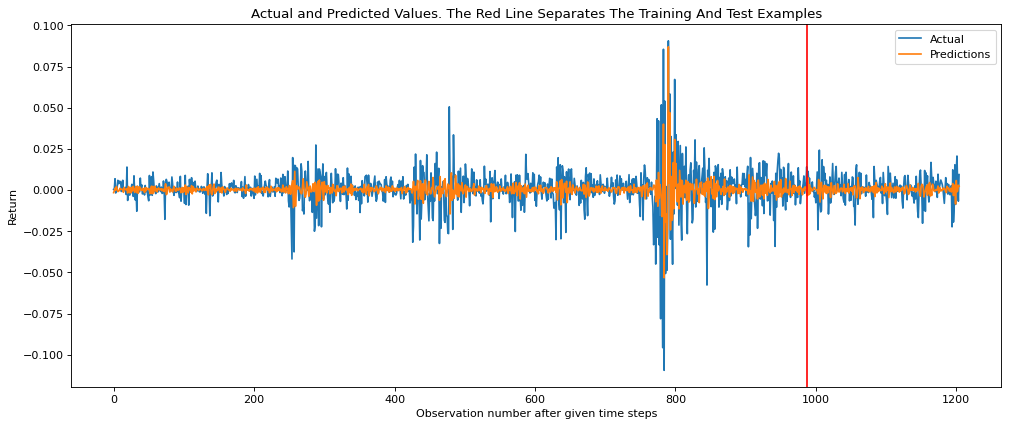

In [21]:
plot_result(Y_train, Y_test, train_predict, test_predict)

In [22]:
#Prediction based on the previous N=20 days (Model: GRU)
predicted_Return = my_GRU_model.predict(LastNDays)
predicted_Return

array([[-0.00302529]], dtype=float32)

## Temporal Convolution

In [23]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

print('Build model...')
model = Sequential()
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(TimeSteps,1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=50, verbose=1, mode='auto', restore_best_weights=True)
print('Train...')

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),verbose=2,epochs=1000)

Build model...
Train...
Epoch 1/1000
31/31 - 1s - loss: 1.7132e-04 - val_loss: 7.2903e-05 - 836ms/epoch - 27ms/step
Epoch 2/1000
31/31 - 0s - loss: 1.7351e-04 - val_loss: 6.1639e-05 - 169ms/epoch - 5ms/step
Epoch 3/1000
31/31 - 0s - loss: 1.6339e-04 - val_loss: 6.6516e-05 - 173ms/epoch - 6ms/step
Epoch 4/1000
31/31 - 0s - loss: 1.6559e-04 - val_loss: 6.3358e-05 - 160ms/epoch - 5ms/step
Epoch 5/1000
31/31 - 0s - loss: 1.6044e-04 - val_loss: 6.2857e-05 - 165ms/epoch - 5ms/step
Epoch 6/1000
31/31 - 0s - loss: 1.6019e-04 - val_loss: 6.4101e-05 - 158ms/epoch - 5ms/step
Epoch 7/1000
31/31 - 0s - loss: 1.6208e-04 - val_loss: 6.1954e-05 - 158ms/epoch - 5ms/step
Epoch 8/1000
31/31 - 0s - loss: 1.5890e-04 - val_loss: 6.7641e-05 - 153ms/epoch - 5ms/step
Epoch 9/1000
31/31 - 0s - loss: 1.5257e-04 - val_loss: 6.2643e-05 - 161ms/epoch - 5ms/step
Epoch 10/1000
31/31 - 0s - loss: 1.4756e-04 - val_loss: 7.4509e-05 - 165ms/epoch - 5ms/step
Epoch 11/1000
31/31 - 0s - loss: 1.5330e-04 - val_loss: 6.2794e-

In [24]:
# make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Mean square error
print_error(Y_train, Y_test, train_predict, test_predict)

Train RMSE: 0.004 RMSE
Test RMSE: 0.009 RMSE


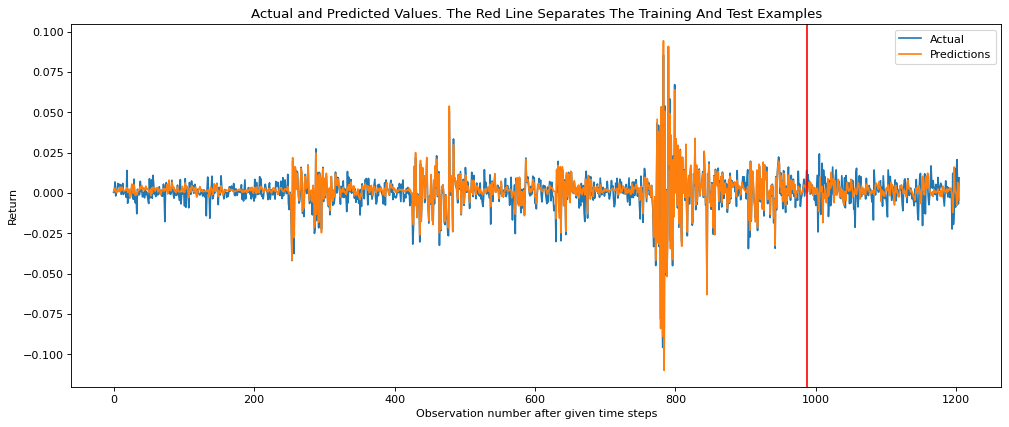

In [25]:
plot_result(Y_train, Y_test, train_predict, test_predict)

In [26]:
#Prediction based on the previous N=20 days (Model: TCN)
predicted_Return = model.predict(LastNDays)
predicted_Return

array([[0.00064314]], dtype=float32)

# Conclusion: the best performance was given by TCN with RMSE for training set 0.004 and for test set 0.009. And the predicted return for Dec 13 is 0.00064314